<a href="https://colab.research.google.com/github/693080593/research/blob/master/%5B5%5D_ER_cHB_R%26L_KFold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs


# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Feed Effect on Biocrude ER Data ML 111020.csv')
Oil_ER = data['Bio-crude Oil ER']
Features = data.drop('Bio-crude Oil ER', axis = 1)

# Success
print ("Bio-crude ER dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:240:30]


Bio-crude ER dataset has 130 data points with 8 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil ER
0,1.7,27.2,14.4,3.5,0.0,5.7,47.5,52.4
30,100.0,0.0,0.0,0.0,0.0,0.0,0.0,82.7
60,10.0,34.0,0.0,0.0,29.3,0.0,6.8,65.5
90,3.5,16.9,17.4,8.9,0.0,35.4,4.5,60.5
120,13.9,46.9,0.0,0.0,28.0,0.0,3.5,60.2


In [2]:
# Check the dataset with the first and last three rows
pd.set_option('display.max_rows',6)
data

,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil ER
0,1.7,27.2,14.4,3.5,0.0,5.7,47.5,52.4
1,6.4,26.5,11.8,9.5,0.0,5.2,39.7,49.8
2,11.0,25.9,9.1,15.4,0.0,4.7,31.9,31.0
...,...,...,...,...,...,...,...,...
127,0.1,71.3,0.5,0.3,22.0,0.2,5.6,64.1
128,11.2,49.2,0.0,0.0,31.2,0.0,6.6,68.6
129,14.0,59.0,0.0,0.0,20.0,0.0,3.0,69.2


In [3]:
# Check the whole information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Lipid             130 non-null    float64
 1   Protein           130 non-null    float64
 2   Cellulose         130 non-null    float64
 3   Hemicellulose     130 non-null    float64
 4   Carbohydrate      130 non-null    float64
 5   Lignin            130 non-null    float64
 6   Ash               130 non-null    float64
 7   Bio-crude Oil ER  130 non-null    float64
dtypes: float64(8)
memory usage: 8.2 KB


In [4]:
# TODO: Minimum price of the data
minimum_Oil_ER = np.min(Oil_ER)

# TODO: Maximum price of the data
maximum_Oil_ER = np.max(Oil_ER)

# TODO: Mean price of the data
mean_Oil_ER = np.mean(Oil_ER)

# TODO: Median price of the data
median_Oil_ER = np.median(Oil_ER)

# TODO: Standard deviation of prices of the data
std_Oil_ER = np.std(Oil_ER)

# Show the calculated statistics

print("Statistics for bio-crude ER dataset:\n")
print("Minimum bio-crude oil ER:{: .2f} %".format(minimum_Oil_ER))
print("Maximum bio-crude oil ER:{: .2f} %".format(maximum_Oil_ER))
print("Mean bio-crude oil ER:{: .2f} %".format(mean_Oil_ER))
print("Median bio-crude oil ER:{: .2f} %".format(median_Oil_ER))
print("Standard deviation of bio-crude oil ER:{: .2f} %".format(std_Oil_ER))

data.describe()

Statistics for bio-crude ER dataset:

Minimum bio-crude oil ER: 2.50 %
Maximum bio-crude oil ER: 92.00 %
Mean bio-crude oil ER: 43.97 %
Median bio-crude oil ER: 45.20 %
Standard deviation of bio-crude oil ER: 19.91 %


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil ER
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,10.077692,25.000000,18.858462,8.073846,19.490000,8.094615,6.849231,43.970769
std,19.042308,26.912396,27.227704,16.668829,26.616579,14.239008,11.152323,19.988467
...,...,...,...,...,...,...,...,...
50%,1.700000,18.350000,0.000000,0.000000,9.900000,0.000000,2.450000,45.200000
75%,12.175000,44.550000,37.325000,7.975000,27.600000,13.975000,7.150000,58.750000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,47.500000,92.000000


In [5]:
# Skewness coefficient
for i in data.columns:
  print('{} Skewness coefficient: '.format(i),data[i].skew())

Lipid Skewness coefficient:  3.145642105212709
Protein Skewness coefficient:  0.8864192169750552
Cellulose Skewness coefficient:  1.4227695437758285
Hemicellulose Skewness coefficient:  2.829539384701448
Carbohydrate Skewness coefficient:  1.8979560437814493
Lignin Skewness coefficient:  2.939748768144541
Ash Skewness coefficient:  2.2045490967537034
Bio-crude Oil ER Skewness coefficient:  0.017409424251991646


In [6]:
# Kurtosis Coefficient
for i in data.columns:
  print("{} Kurtosis Coefficient: ".format(i),data[i].kurt())

Lipid Kurtosis Coefficient:  11.064056796832787
Protein Kurtosis Coefficient:  0.0489727584476678
Cellulose Kurtosis Coefficient:  1.143753597302866
Hemicellulose Kurtosis Coefficient:  9.873863835156008
Carbohydrate Kurtosis Coefficient:  3.298425612607219
Lignin Kurtosis Coefficient:  13.31329522311922
Ash Kurtosis Coefficient:  4.20825454521569
Bio-crude Oil ER Kurtosis Coefficient:  -0.6432614231322034


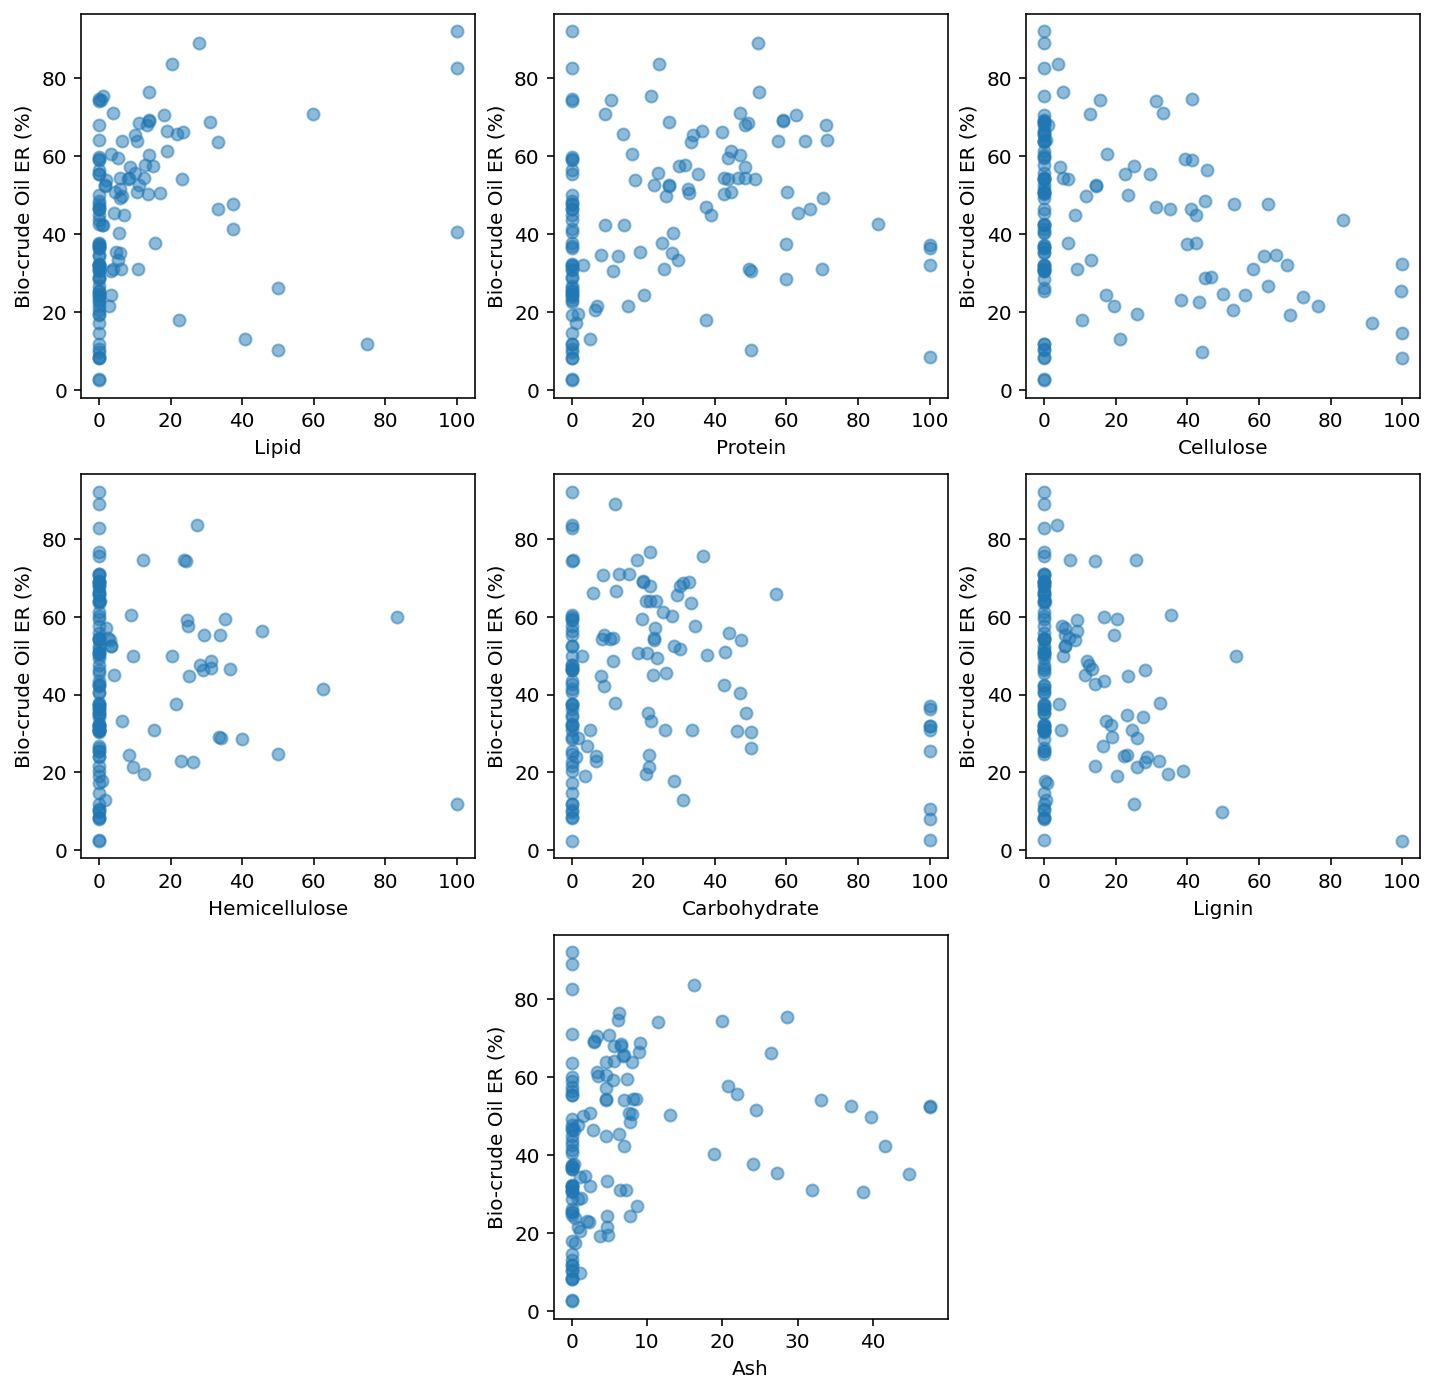

In [7]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Lipid'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Protein'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Lignin'],data['Bio-crude Oil ER'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil ER (%)')
plt.scatter(data['Ash'],data['Bio-crude Oil ER'],alpha = 0.5)
plt.show()

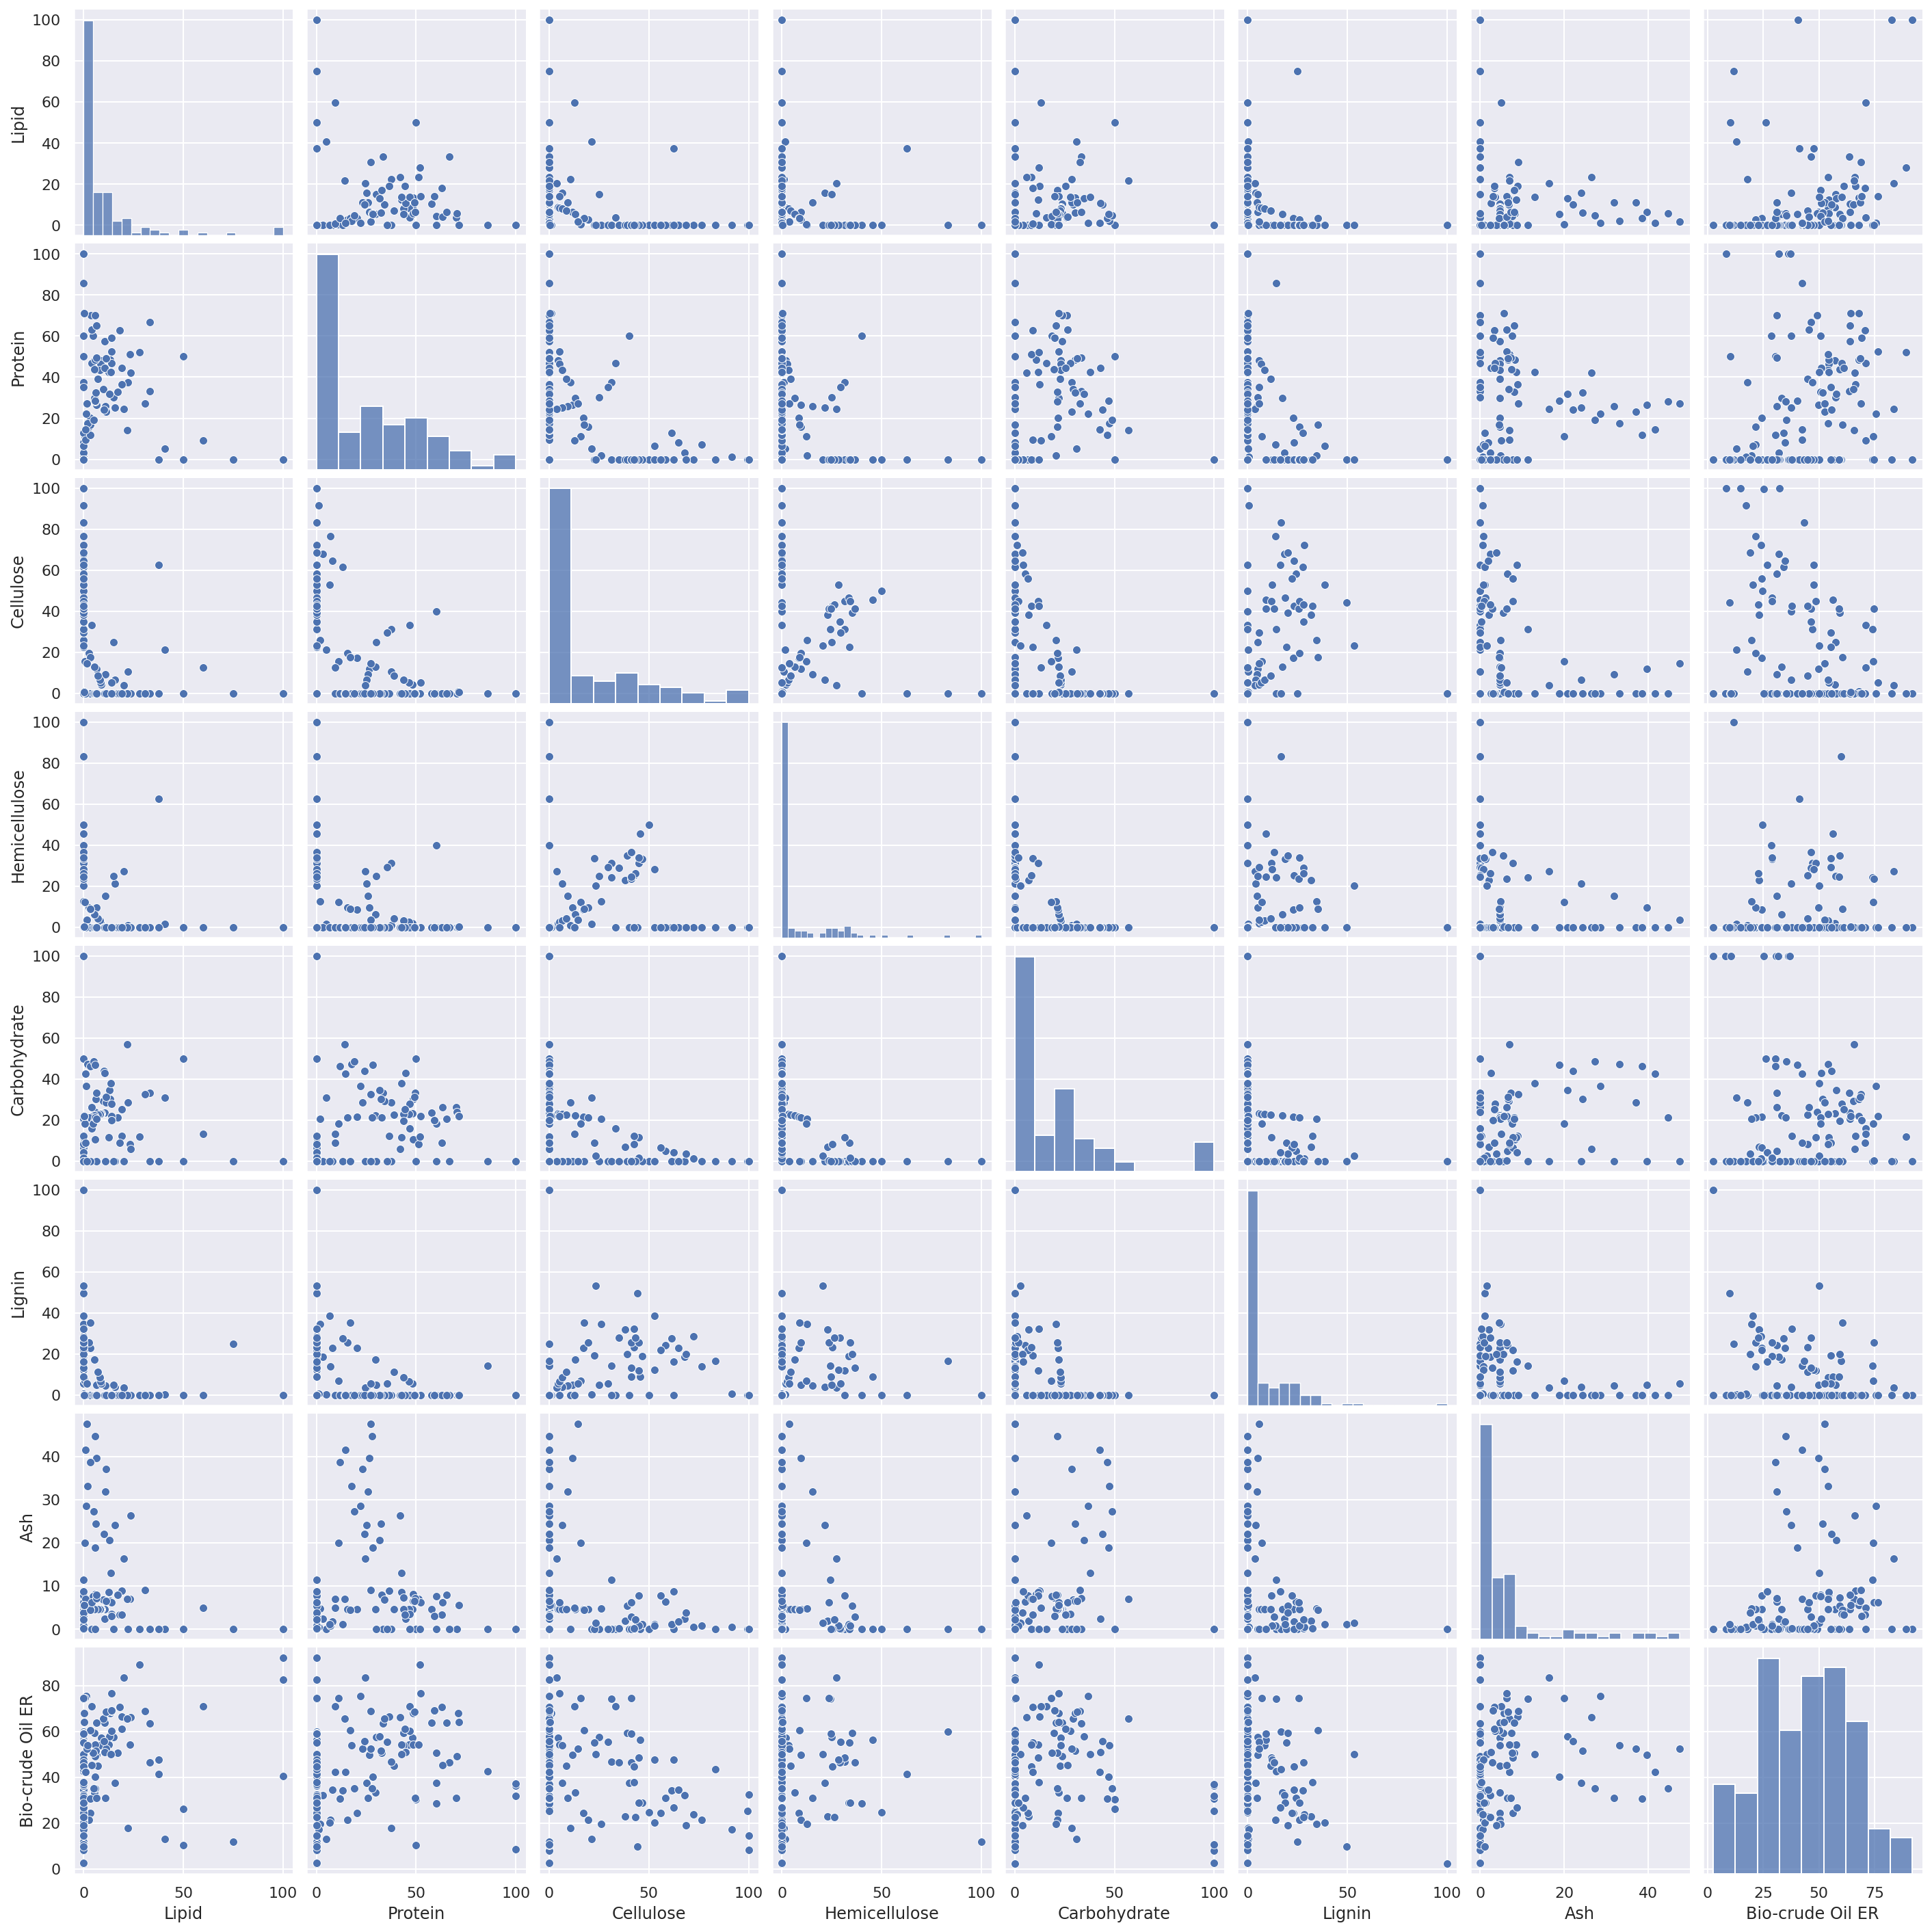

In [8]:
# Scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

# Initialization
sns.set()

# Draw the distribution matrix
sns.pairplot(data)

# save figure
plt.savefig('cHB.png')
plt.show()

(array([2., 0., 0., 3., 3., 3., 1., 0., 2., 2., 3., 3., 5., 2., 3., 7., 5.,
        3., 4., 5., 0., 3., 4., 3., 4., 3., 6., 5., 6., 3., 4., 3., 4., 0.,
        4., 4., 3., 3., 3., 0., 4., 1., 0., 0., 1., 1., 0., 0., 1., 1.]),
 array([ 2.5 ,  4.29,  6.08,  7.87,  9.66, 11.45, 13.24, 15.03, 16.82,
        18.61, 20.4 , 22.19, 23.98, 25.77, 27.56, 29.35, 31.14, 32.93,
        34.72, 36.51, 38.3 , 40.09, 41.88, 43.67, 45.46, 47.25, 49.04,
        50.83, 52.62, 54.41, 56.2 , 57.99, 59.78, 61.57, 63.36, 65.15,
        66.94, 68.73, 70.52, 72.31, 74.1 , 75.89, 77.68, 79.47, 81.26,
        83.05, 84.84, 86.63, 88.42, 90.21, 92.  ]),
 <a list of 50 Patch objects>)

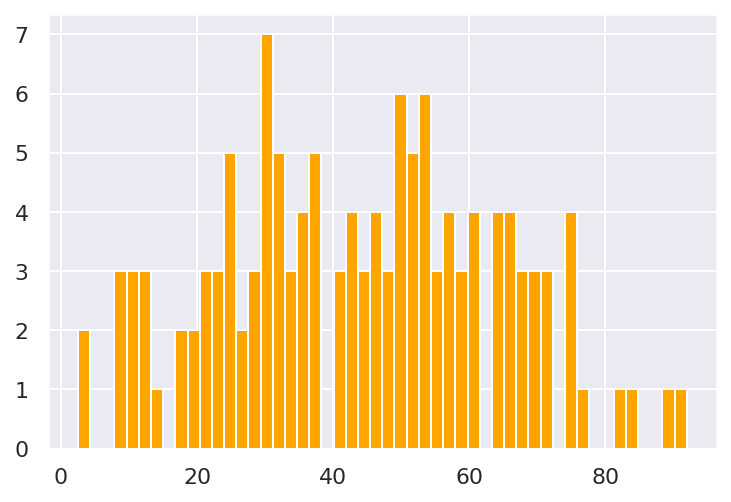

In [9]:
plt.hist(data['Bio-crude Oil ER'],bins=50,color='orange')

(array([66.,  7.,  9.,  5.,  3.,  7.,  5.,  5.,  1.,  3.,  2.,  3.,  0.,
         0.,  1.,  1.,  2.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

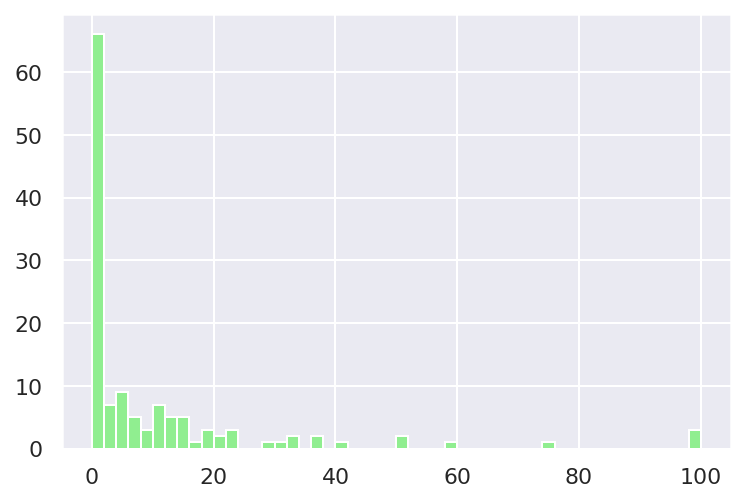

In [10]:
plt.hist(data['Lipid'],bins=50,color='lightgreen')


In [11]:
# As correlation coefficient was estimated, the default is Pearson correlation coefficient.
correlation = data.corr()
correlation

,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil ER
Lipid,1.000000,-0.038032,-0.285143,-0.156805,-0.106838,-0.221906,-0.088286,0.262328
Protein,-0.038032,1.000000,-0.493164,-0.301192,-0.091479,-0.393089,0.032348,0.273416
Cellulose,-0.285143,-0.493164,1.000000,0.102795,-0.429915,0.329630,-0.245008,-0.325750
...,...,...,...,...,...,...,...,...
Lignin,-0.221906,-0.393089,0.329630,0.153690,-0.320301,1.000000,-0.174838,-0.293673
Ash,-0.088286,0.032348,-0.245008,-0.137756,0.034991,-0.174838,1.000000,0.201325
Bio-crude Oil ER,0.262328,0.273416,-0.325750,-0.009341,-0.122458,-0.293673,0.201325,1.000000


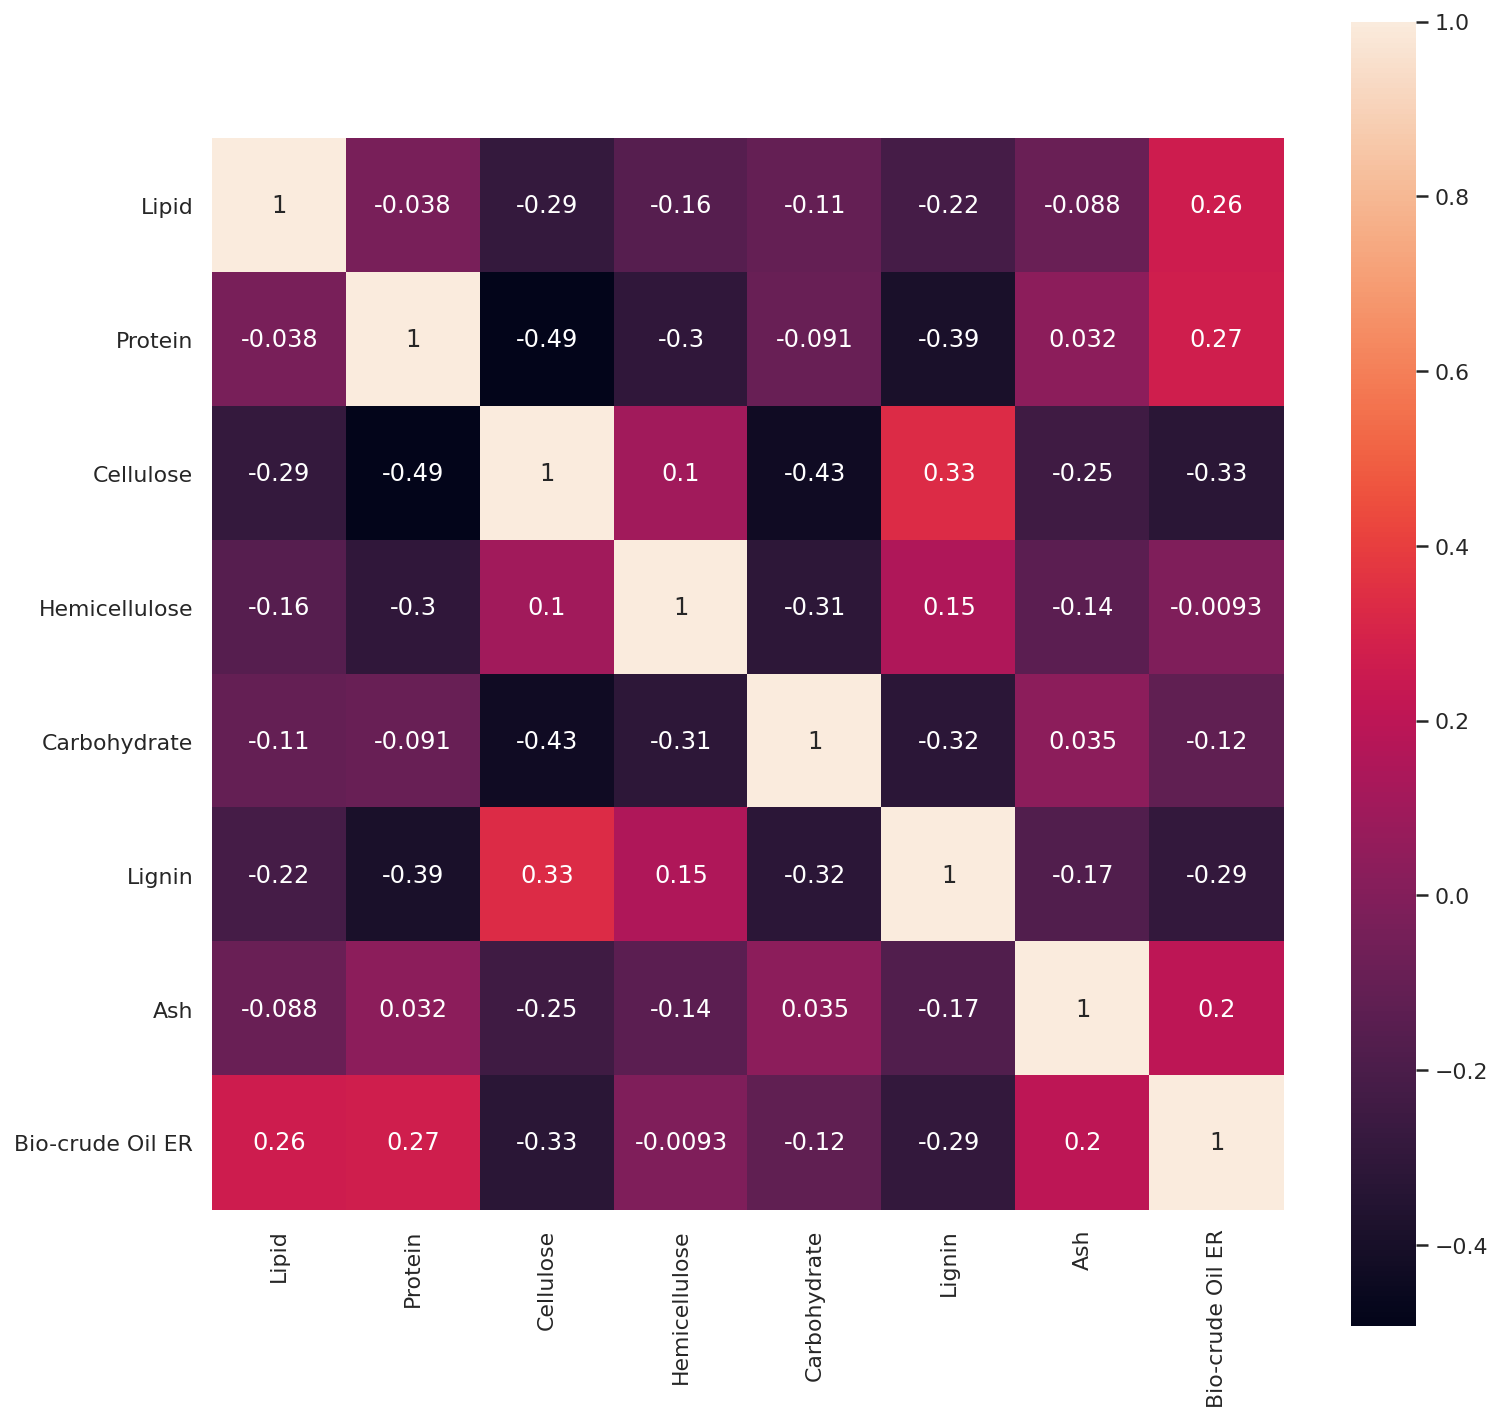

In [12]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [13]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [14]:
# Ridge Regression
# Model set up & training
from sklearn.linear_model import Ridge

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 150)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 4 folds.  
kf =KFold(n_splits=4, shuffle=True)

cnt = 1

rd_intercept_all=[]
rd_coef_all=[]

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    # Alpha here is regularization parameter, initialize as 1.
    rd = Ridge(alpha=1)
    rd.fit(X_train, y_train)
    # print(rd.coef_)
    # print(rd.intercept_)

    # Predict training set and test set
    y_train_predict = rd.predict(X_train)
    y_test_predict = rd.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    rd_intercept_all.append(rd.intercept_)
    rd_coef_all.append(rd.coef_)
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of rd.intercept",np.mean(rd_intercept_all))
print("Standard deviation of rd.intercept",np.std(rd_intercept_all))
print("Mean values of rd.coef",np.mean(rd_coef_all, axis=0))
print("Standard deviations of rd.coef",np.std(rd_coef_all, axis=0))
print("")
print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of rd.intercept 89.69194398800423
Standard deviation of rd.intercept 19.043766549858518
Mean values of rd.coef [-0.25887006 -0.37712629 -0.60808881 -0.37861348 -0.6113306  -0.70814701
 -0.20322682]
Standard deviations of rd.coef [0.19955    0.16902929 0.19751457 0.24592985 0.19233973 0.223279
 0.24024896]

Mean value of MAE of training set 13.590356025398826
Standard deviation of MAE of training set 0.8441373980056924
Mean value of MAE of test set 14.247972592929374
Standard deviation of MAE of test set 2.583296000797572

Mean value of RMSE of training set 16.58147788338927
Standard deviation of RMSE of training set 1.1373400425253395
Mean value of RMSE of test set 17.76668149395098
Standard deviation of RMSE of test set 3.7365010053823267

Mean value of R2 of training set 0.30386190318913275
Standard deviation of R2 of training set 0.07015590329159932
Mean value of R2 of test set 0.17641690119864195
Standard deviation of R2 of test set 0.26639728064926943

Mean value of MRE

Text(0.5, 1.0, 'y_pred vs. y_true')

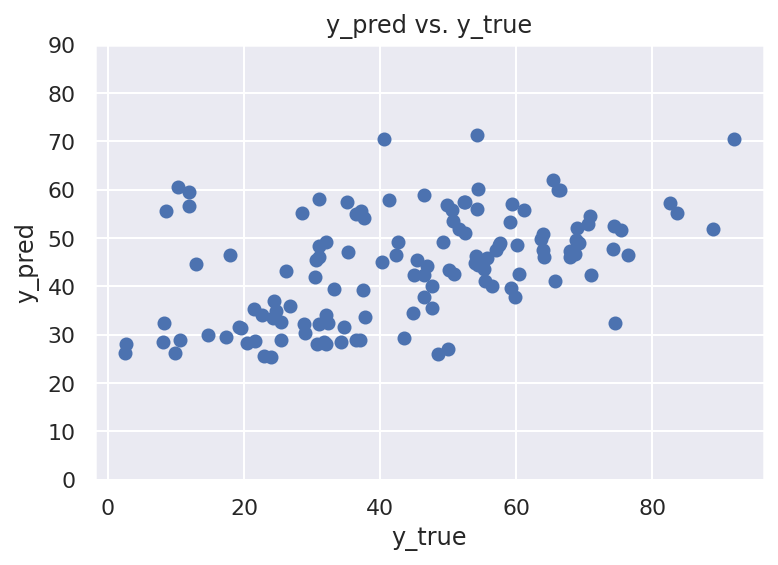

In [16]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 90)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

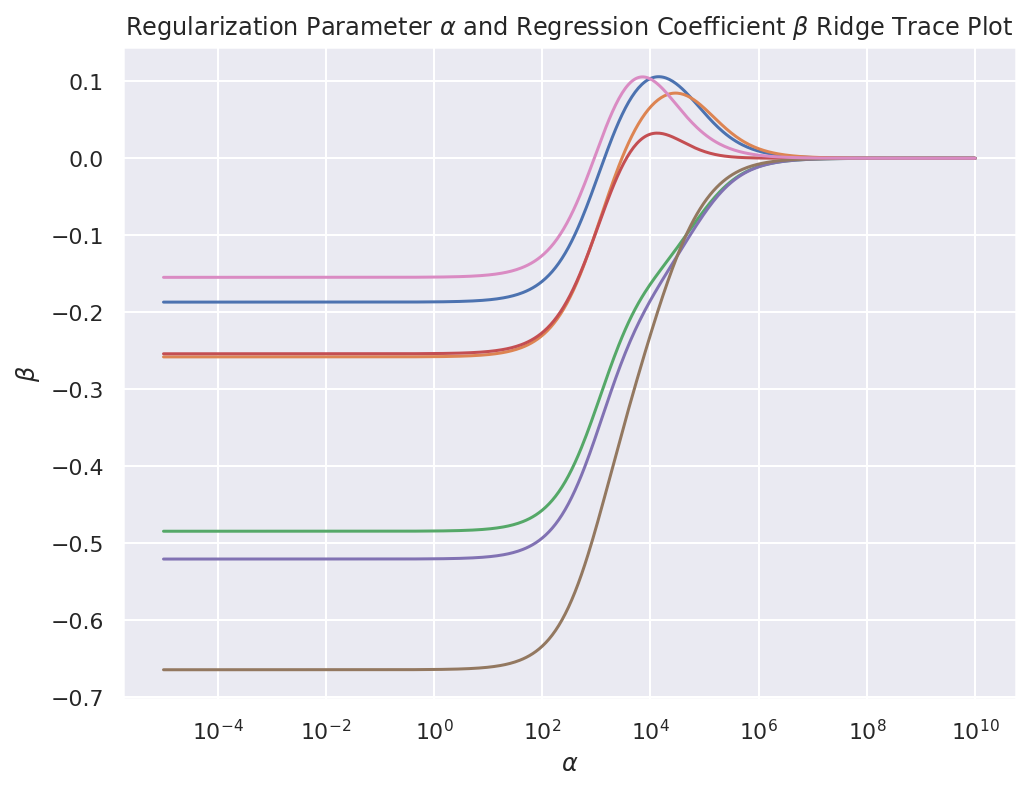

In [17]:
# In KFold, use one group of X_train and y_train to draw Ridge plot.
# Parameter set and model training
alphas=10**np.linspace(-5,10,500)
betas=[]
for alpha in alphas: 
  rd = Ridge(alpha = alpha)
  rd.fit(X_train, y_train)
  betas.append(rd.coef_)

# Draw Ridge plot
plt.figure(figsize=(8,6))
plt.plot(alphas,betas)

# Log transformation of data
plt.xscale('log')

# Add grid
plt.grid(True)

# Axis
plt.axis('tight')
plt.title(r'Regularization Parameter $\alpha$ and Regression Coefficient $\beta$ Ridge Trace Plot')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()


In [18]:
# No use now.
# Cross-validated ridge regression
from sklearn.linear_model import RidgeCV
from sklearn import metrics
rd_cv = RidgeCV(alphas=alphas, cv=10, scoring='r2')
rd_cv.fit(X_train,y_train)
rd_cv.alpha_

20827.5063019051

In [19]:
# No use now.
# Model training using alpha equal to 20827.5063019051

rd=Ridge(alpha=20827.5063019051)
fit_intercept=False
rd.fit(X_train,y_train)
print(rd.coef_)
print(rd.intercept_)

[ 0.10339412  0.08291112 -0.13265839  0.03017099 -0.14674932 -0.16022784
  0.08308394]
47.63557948813643


In [20]:
# No use now.
# Cross-validated ridge regression
from sklearn.linear_model import RidgeCV
from sklearn import metrics
rd_cv = RidgeCV(alphas=alphas, cv=10, scoring='r2')
rd_cv.fit(X_train,y_train)

# Model training using alpha equal to rd_cv.alpha_
rd=Ridge(alpha=rd_cv.alpha_)
fit_intercept=False
rd.fit(X_train,y_train)
print(rd.coef_)
print(rd.intercept_)

[ 0.10339412  0.08291112 -0.13265839  0.03017099 -0.14674932 -0.16022784
  0.08308394]
47.63557948813643


In [21]:
# Modified Ridge Regression
# Model set up & training
from sklearn.linear_model import Ridge

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

# Cross-validated ridge regression
from sklearn.linear_model import RidgeCV

np.random.seed(seed = 150)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 4 folds.  
kf =KFold(n_splits=4, shuffle=True)

cnt = 1

rd_intercept_all=[]
rd_coef_all=[]

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    rd_cv = RidgeCV(alphas=alphas, cv=10, scoring='r2')
    rd_cv.fit(X_train,y_train)
    
    # Model training using alpha equal to rd_cv.alpha_
    rd=Ridge(alpha=rd_cv.alpha_)
    fit_intercept=False
    rd.fit(X_train, y_train)
    # print(rd.coef_)
    # print(rd.intercept_)

    # Predict training set and test set
    y_train_predict = rd.predict(X_train)
    y_test_predict = rd.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    rd_intercept_all.append(rd.intercept_)
    rd_coef_all.append(rd.coef_)
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of rd.intercept",np.mean(rd_intercept_all))
print("Standard deviation of rd.intercept",np.std(rd_intercept_all))
print("Mean values of rd.coef",np.mean(rd_coef_all, axis=0))
print("Standard deviations of rd.coef",np.std(rd_coef_all, axis=0))
print("")
print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of rd.intercept 47.72054380806247
Standard deviation of rd.intercept 0.352724424922466
Mean values of rd.coef [ 0.11753876  0.06338915 -0.16718996  0.00983846 -0.14259627 -0.15621609
  0.09976863]
Standard deviations of rd.coef [0.03455073 0.03380275 0.02593979 0.03050068 0.01800748 0.04036073
 0.01214803]

Mean value of MAE of training set 14.061652394151348
Standard deviation of MAE of training set 1.011862334973538
Mean value of MAE of test set 14.458665279236241
Standard deviation of MAE of test set 2.311469522585369

Mean value of RMSE of training set 17.21569970424662
Standard deviation of RMSE of training set 1.1128816041343592
Mean value of RMSE of test set 17.842532513994097
Standard deviation of RMSE of test set 2.8525737406567995

Mean value of R2 of training set 0.24999257797788463
Standard deviation of R2 of training set 0.06830499607568974
Mean value of R2 of test set 0.17667612476487768
Standard deviation of R2 of test set 0.1672188939984388

Mean value of MRE

Text(0.5, 1.0, 'y_pred vs. y_true')

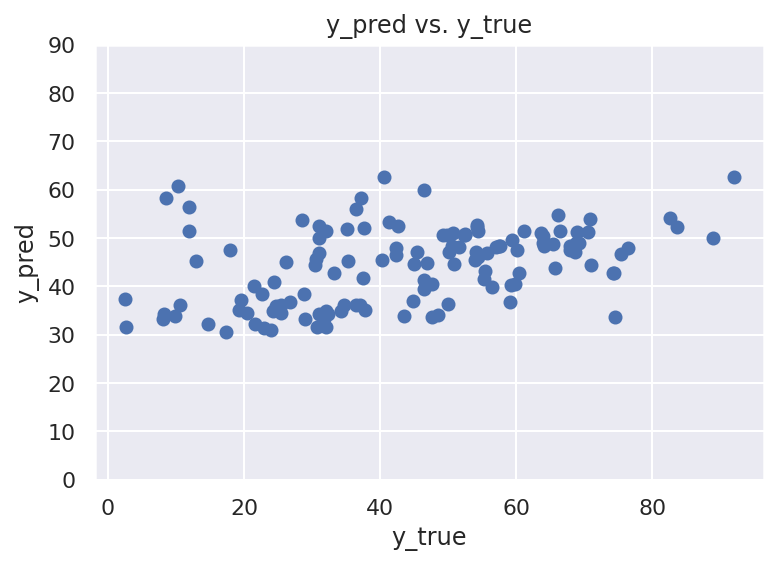

In [23]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 90)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [24]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_ER_MLR_Ridge.csv', index = False, header=True)

In [ ]:
# No use now.
# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [[21.9, 17.8, 0, 0, 58.9, 0, 1.1], # Model Food Waste
                              [19.7, 13.5, 0, 0, 22.9, 0, 7.3],  # N.salina
                              [5.5, 45.3, 0, 0, 14.5, 0, 10.4]]  # G.sulphuraria    
# Show predictions
for i, Oil_Yield in enumerate(rd.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Predicted bio-crude oil yield for the composition of Feedstock 1: 31.61 wt%
Predicted bio-crude oil yield for the composition of Feedstock 2: 33.93 wt%
Predicted bio-crude oil yield for the composition of Feedstock 3: 27.95 wt%


In [ ]:
# No use now.
for i in [0,1,2]:
  vs.PredictTrials(Features, Oil_Yields, rd.fit, feedstock_composition_data[i:i+1])

Trial 1: $31.48
Trial 2: $32.31
Trial 3: $31.76
Trial 4: $33.10
Trial 5: $32.34
Trial 6: $31.55
Trial 7: $31.53
Trial 8: $32.90
Trial 9: $31.60
Trial 10: $31.56

Range in prices: $1.62
Trial 1: $34.08
Trial 2: $34.95
Trial 3: $35.01
Trial 4: $33.98
Trial 5: $35.02
Trial 6: $34.01
Trial 7: $33.92
Trial 8: $34.95
Trial 9: $34.49
Trial 10: $33.93

Range in prices: $1.11
Trial 1: $28.16
Trial 2: $29.29
Trial 3: $28.41
Trial 4: $28.17
Trial 5: $28.87
Trial 6: $27.94
Trial 7: $28.05
Trial 8: $28.55
Trial 9: $28.42
Trial 10: $28.36

Range in prices: $1.35


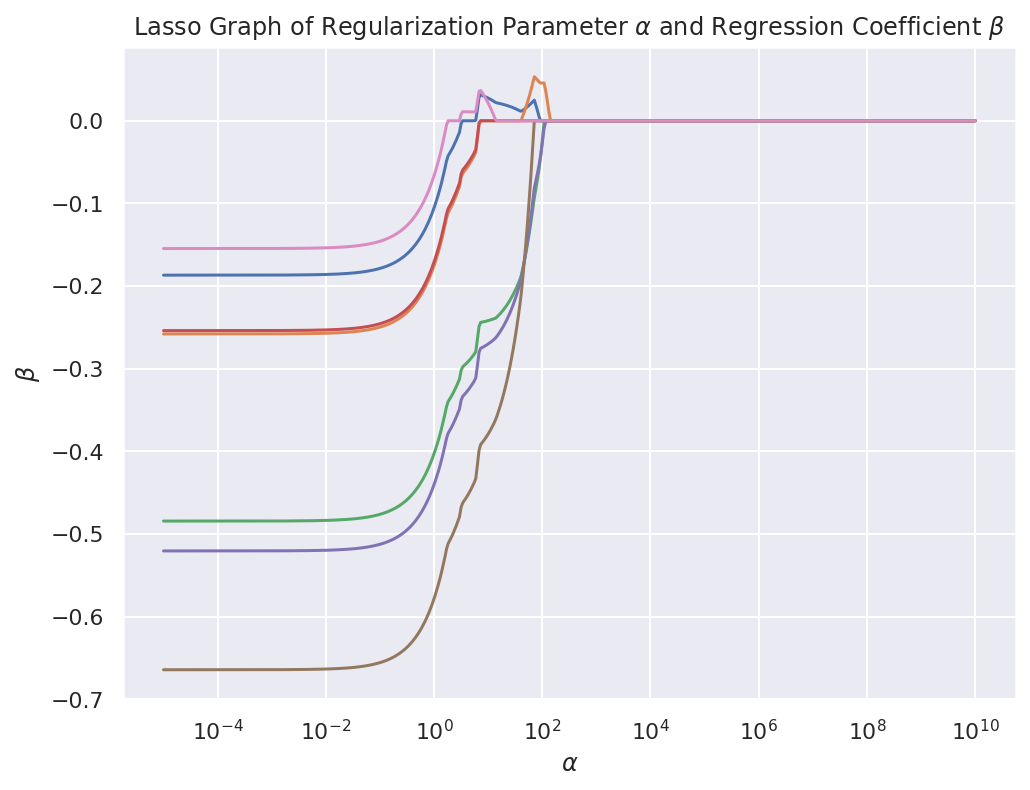

In [25]:
# In KFold, use one group of X_train and y_train to draw Lasso plot.
# Model training
from sklearn.linear_model import Lasso
alphas = 10**np.linspace(-5,10,500)
betas = []
for alpha in alphas:
  Las = Lasso(alpha = alpha)
  Las.fit(X_train,y_train)
  betas.append(Las.coef_)
plt.figure(figsize=(8,6))
plt.plot(alphas,betas)
plt.xscale('log')
plt.grid(True)
plt.axis('tight')
plt.title(r'Lasso Graph of Regularization Parameter $\alpha$ and Regression Coefficient $\beta$')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()

In [26]:
# No use now.
# Optimize regularization parameter of Lasso regression using cross-validation 
from sklearn.linear_model import LassoCV
from sklearn import metrics
Las_cv = LassoCV(alphas=alphas,cv=10)
Las_cv.fit(X_train,y_train)
Las_cv.alpha_

31.116158278243567

In [27]:
# No use now.
# Train model using alpha equal to 31.116158278243567
Las = Lasso(alpha=31.116158278243567)
fit_intercept=False
Las.fit(X_train,y_train)
print(Las.coef_)
print(Las.intercept_)

[ 0.01496335  0.         -0.20631376 -0.         -0.21722537 -0.26471228
  0.        ]
55.02098372268561


In [28]:
# No use now.
# Optimize regularization parameter of Lasso regression using cross-validation 
from sklearn.linear_model import LassoCV
from sklearn import metrics
Las_cv = LassoCV(alphas=alphas,cv=10)
Las_cv.fit(X_train,y_train)

# Train model using alpha equal to Las_cv.alpha_
Las = Lasso(alpha=Las_cv.alpha_)
fit_intercept=False
Las.fit(X_train,y_train)
print(Las.coef_)
print(Las.intercept_)

[ 0.01496335  0.         -0.20631376 -0.         -0.21722537 -0.26471228
  0.        ]
55.02098372268561


In [29]:
# Modified Lasso Regression
# Model set up & training
from sklearn.linear_model import Lasso

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

# Cross-validated ridge regression
from sklearn.linear_model import LassoCV

np.random.seed(seed = 150)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 4 folds.  
kf =KFold(n_splits=4, shuffle=True)

cnt = 1

Las_intercept_all=[]
Las_coef_all=[]

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_ER):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_ER.iloc[train_index],Oil_ER.iloc[test_index]
    
    Las_cv = LassoCV(alphas=alphas,cv=10)
    Las_cv.fit(X_train,y_train)
    
    # Train model using alpha equal to Las_cv.alpha_
    Las = Lasso(alpha=Las_cv.alpha_)
    fit_intercept=False
    Las.fit(X_train,y_train)
    # print(rd.coef_)
    # print(rd.intercept_)

    # Predict training set and test set
    y_train_predict = Las.predict(X_train)
    y_test_predict = Las.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    Las_intercept_all.append(Las.intercept_)
    Las_coef_all.append(Las.coef_)
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of Las.intercept",np.mean(Las_intercept_all))
print("Standard deviation of Las.intercept",np.std(Las_intercept_all))
print("Mean values of Las.coef",np.mean(Las_coef_all, axis=0))
print("Standard deviations of Las.coef",np.std(Las_coef_all, axis=0))
print("")
print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of Las.intercept 54.11233799959579
Standard deviation of Las.intercept 2.4346759431561007
Mean values of Las.coef [ 0.05038548  0.         -0.24019781 -0.02351658 -0.21092166 -0.23771438
  0.03274452]
Standard deviations of Las.coef [0.05092758 0.         0.03324842 0.04073192 0.03274039 0.09436101
 0.03512832]

Mean value of MAE of training set 13.905276228237545
Standard deviation of MAE of training set 0.9821730175435969
Mean value of MAE of test set 14.287072423271365
Standard deviation of MAE of test set 2.3137963262136063

Mean value of RMSE of training set 17.082092657122885
Standard deviation of RMSE of training set 1.1104571045224174
Mean value of RMSE of test set 17.721323080622152
Standard deviation of RMSE of test set 2.8339978744139565

Mean value of R2 of training set 0.2614723709220268
Standard deviation of R2 of training set 0.06858570870684355
Mean value of R2 of test set 0.18874714571425494
Standard deviation of R2 of test set 0.15819236497857667

Mean valu

Text(0.5, 1.0, 'y_pred vs. y_true')

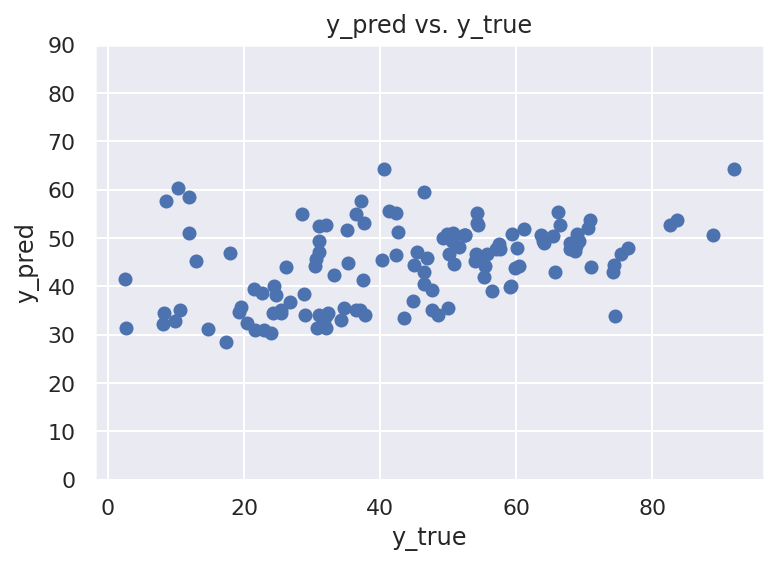

In [31]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 90)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [32]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_ER_MLR_Lasso.csv', index = False, header=True)

In [ ]:
# No use now.
# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [[21.9, 17.8, 0, 0, 58.9, 0, 1.1], # Model Food Waste
                              [19.7, 13.5, 0, 0, 22.9, 0, 7.3],  # N.salina
                              [5.5, 45.3, 0, 0, 14.5, 0, 10.4]]  # G.sulphuraria    
# Show predictions
for i, Oil_Yield in enumerate(Las.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Predicted bio-crude oil yield for the composition of Feedstock 1: 32.15 wt%
Predicted bio-crude oil yield for the composition of Feedstock 2: 31.07 wt%
Predicted bio-crude oil yield for the composition of Feedstock 3: 26.72 wt%


In [ ]:
# No use now.
for i in [0,1,2]:
  vs.PredictTrials(Features, Oil_Yields, Las.fit, feedstock_composition_data[i:i+1])

Trial 1: $32.24
Trial 2: $33.02
Trial 3: $32.43
Trial 4: $33.78
Trial 5: $32.94
Trial 6: $32.17
Trial 7: $32.12
Trial 8: $33.74
Trial 9: $32.31
Trial 10: $32.20

Range in prices: $1.67
Trial 1: $31.13
Trial 2: $32.12
Trial 3: $32.02
Trial 4: $31.74
Trial 5: $32.59
Trial 6: $31.45
Trial 7: $31.46
Trial 8: $31.78
Trial 9: $32.13
Trial 10: $31.34

Range in prices: $1.46
Trial 1: $26.00
Trial 2: $27.27
Trial 3: $26.28
Trial 4: $26.51
Trial 5: $27.06
Trial 6: $26.13
Trial 7: $26.27
Trial 8: $26.37
Trial 9: $26.65
Trial 10: $26.48

Range in prices: $1.26
